<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Advance_Decline_Nifty100B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
# Plotting graphs
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator

In [37]:
!pip install yfinance --upgrade --no-cache-dir
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [38]:
nifty10= ['HDFCBANK.NS' ,'RELIANCE.NS' ,'HDFC.NS' ,'INFY.NS' ,'ICICIBANK.NS' ,'TCS.NS' ,'ITC.NS' ,'KOTAKBANK.NS' ,'LT.NS' , 'AXISBANK.NS']

In [39]:
nifty20=['NESTLEIND.NS','MARUTI.NS','GAIL.NS','TATASTEEL.NS','TITAN.NS','BHARTIARTL.NS','BAJAJFINSV.NS','NTPC.NS','BRITANNIA.NS','COALINDIA.NS','HINDALCO.NS','INDUSINDBK.NS','ONGC.NS','ULTRACEMCO.NS','HEROMOTOCO.NS','TECHM.NS','BAJFINANCE.NS','ZEEL.NS','WIPRO.NS','BAJAJ-AUTO.NS','SHREECEM.NS','CIPLA.NS','GRASIM.NS','M&M.NS','SBIN.NS']

In [40]:
nifty100='ongc.ns,indigo.ns,tcs.ns,\
tatamotors.ns,hdfcbank.ns,ofss.ns,\
wipro.ns,infy.ns,hindzinc.ns,\
nestleind.ns,adaniports.ns,\
marico.ns,pghh.ns,\
techm.ns,BAJAJ-AUTO.NS,\
HINDUNILVR.NS,HCLTECH.NS,\
HEROMOTOCO.NS,\
RELIANCE.NS,\
BPCL.NS,BRITANNIA.NS,\
POWERGRID.NS,\
TORNTPHARM.NS,\
COLPAL.NS,\
BHARTIARTL.NS,ICICIGI.NS,ITC.NS,IOC.NS,\
AXISBANK.NS,DRREDDY.NS,HDFCLIFE.NS,\
TATASTEEL.NS,UPL.NS,ABBOTINDIA.NS,\
HDFC.NS,SBILIFE.NS,DMART.NS,\
GODREJCP.NS,\
UBL.NS,\
ASIANPAINT.NS,\
DABUR.NS,\
PIDILITIND.NS,\
TITAN.NS,\
COALINDIA.NS,\
GAIL.NS,\
PETRONET.NS,HDFCAMC.NS,HAVELLS.NS,\
ICICIBANK.NS,MARUTI.NS,BAJAJHLDNG.NS,NAUKRI.NS,\
HINDPETRO.NS,LT.NS,GRASIM.NS,\
CONCOR.NS,JSWSTEEL.NS,M&M.NS,\
ULTRACEMCO.NS,BIOCON.NS,IGL.NS,PFC.NS,\
HINDALCO.NS,CADILAHC.NS,KOTAKBANK.NS,\
BANDHANBNK.NS,NHPC.NS,\
DIVISLAB.NS,\
CIPLA.NS,\
BERGEPAINT.NS,\
ZEEL.NS,\
SHREECEM.NS,\
BAJFINANCE.NS,\
LUPIN.NS,\
SIEMENS.NS,BANKBARODA.NS,\
NTPC.NS,GICRE.NS,MUTHOOTFIN.NS,ACC.NS,INDUSINDBK.NS,\
AMBUJACEM.NS,BAJAJFINSV.NS,PNB.NS,EICHERMOT.NS,PAGEIND.NS,\
SBIN.NS,MOTHERSUMI.NS,ICICIPRULI.NS,SUNPHARMA.NS,MCDOWELL-N.NS,\
AUROPHARMA.NS,\
ADANITRANS.NS,BOSCHLTD.NS,\
DLF.NS,SRTRANSFIN.NS,PEL.NS,NMDC.NS'
nifty100 = nifty100.split(',')
# ,infratel.ns

In [41]:
START = "2016-01-01"  #yyyy-mm-dd
lst= []

In [42]:
nifty= yf.download('^NSEI', start=START)

[*********************100%***********************]  1 of 1 completed


In [43]:
#set.intersection(set(nifty20),set(nifty10))

In [44]:
for i in range(len(nifty100)):
  dfi = pdr.get_data_yahoo(nifty100[i], start=START)
  dfi = dfi.dropna()
  dfi = dfi.iloc[:,:4]
  lst.append(dfi)

#df1.head(3)
print('\n All Completed \n')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [45]:
nlst=[]
for i in range(len(nifty100)):
  nlst.append(lst[i].Close)

In [46]:
df = pd.DataFrame(nlst).T

In [47]:
namelist =[]
for i in range(1 , len(nifty100)+1):
  namelist.append('Close'+str(i))

In [48]:
df.columns=namelist

In [49]:
data_copy=df.copy()

In [50]:
df.head()

,Close1,Close2,Close3,Close4,Close5,Close6,Close7,Close8,Close9,Close10,Close11,Close12,Close13,Close14,Close15,Close16,Close17,Close18,Close19,Close20,Close21,Close22,Close23,Close24,Close25,Close26,Close27,Close28,Close29,Close30,Close31,Close32,Close33,Close34,Close35,Close36,Close37,Close38,Close39,Close40,...,Close59,Close60,Close61,Close62,Close63,Close64,Close65,Close66,Close67,Close68,Close69,Close70,Close71,Close72,Close73,Close74,Close75,Close76,Close77,Close78,Close79,Close80,Close81,Close82,Close83,Close84,Close85,Close86,Close87,Close88,Close89,Close90,Close91,Close92,Close93,Close94,Close95,Close96,Close97,Close98
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01,161.666672,1343.449951,1208.199951,401.899994,544.375000,3801.750000,208.668808,552.625000,149.149994,5785.149902,267.549988,227.149994,5603.250000,520.049988,2518.000000,856.549988,422.924988,2686.050049,502.907928,298.683319,1493.199951,105.750023,1478.900024,976.750000,312.639740,NaN,218.333328,108.312500,449.899994,3108.600098,NaN,245.234406,293.566681,5895.950195,1258.449951,NaN,NaN,447.350006,943.700012,878.750000,...,2824.000000,86.866669,105.389999,101.250000,84.900002,332.700012,727.250000,NaN,21.200001,1162.500000,655.349976,186.571426,432.899994,11383.549805,609.585022,1845.250000,1202.650024,159.050003,120.416664,NaN,178.750000,1373.650024,963.849976,205.649994,1983.800049,117.599998,1737.084961,13510.349609,227.800003,132.000000,NaN,815.549988,602.099976,881.400024,41.049999,19199.099609,121.550003,865.700012,980.159790,91.250000
2016-01-04,158.699997,1262.099976,1184.800049,377.049988,535.250000,3746.399902,209.137558,539.450012,145.050003,5669.799805,257.950012,225.300003,5600.000000,516.400024,2483.350098,859.000000,422.975006,2637.800049,492.977081,297.149994,1486.300049,105.712524,1448.349976,974.299988,300.060699,NaN,216.733337,106.612503,438.399994,3056.000000,NaN,244.758041,289.233337,5930.899902,1216.699951,NaN,NaN,443.250000,939.950012,880.799988,...,2749.149902,89.033333,103.849998,98.175003,80.750000,320.799988,705.299988,NaN,21.500000,1149.699951,645.650024,188.178574,421.950012,11059.299805,605.244995,1795.150024,1190.250000,151.199997,119.416664,NaN,178.350006,1344.000000,934.200012,202.149994,1959.500000,112.800003,1749.530029,13558.049805,220.699997,127.088890,NaN,799.099976,595.489990,844.299988,38.650002,18815.650391,118.400002,840.900024,959.974304,89.949997
2016-01-05,161.233337,1252.949951,1174.474976,374.450012,531.200012,3739.449951,208.837555,537.025024,151.250000,5662.399902,255.699997,229.649994,5523.649902,521.900024,2502.350098,847.950012,421.399994,2616.850098,497.855835,300.883331,1483.349976,104.362526,1435.949951,974.250000,296.984802,NaN,216.566666,110.662498,436.450012,3070.649902,NaN,261.335663,290.200012,5878.100098,1209.400024,NaN,NaN,438.633331,950.099976,900.650024,...,2733.050049,89.025002,111.290001,100.849998,82.599998,313.600006,707.750000,NaN,22.000000,1147.500000,640.849976,183.892853,425.049988,11124.299805,599.784973,1783.050049,1195.800049,148.100006,118.541664,NaN,177.449997,1341.300049,935.250000,204.000000,1946.000000,110.599998,1715.989990,13828.549805,217.750000,128.688889,NaN,800.500000,589.000000,863.500000,38.799999,18632.699219,118.400002,864.900024,956.626221,93.250000
2016-01-06,158.366669,1235.400024,1190.800049,365.899994,533.549988,3737.250000,208.162552,534.674988,145.699997,5719.500000,251.800003,226.850006,5640.149902,525.099976,2485.500000,843.049988,420.700012,2578.199951,511.253815,304.100006,1500.849976,104.625023,1442.849976,949.450012,295.837067,NaN,210.066666,112.712502,430.700012,3046.250000,NaN,256.047974,295.566681,5783.600098,1209.300049,NaN,NaN,435.383331,941.849976,886.400024,...,2735.300049,87.291664,113.540001,100.349998,80.550003,320.750000,703.599976,NaN,21.850000,1137.199951,652.099976,181.178574,423.149994,11452.349609,610.724976,1753.199951,1205.300049,148.699997,117.875000,NaN,177.199997,1320.349976,943.950012

In [51]:
df['diff1'] = (df['Close1'].diff() > 0 ).astype(int) + (df['Close2'].diff() >0).astype(int)+ (df['Close3'].diff()>0).astype(int)+(df['Close4'].diff()>0).astype(int) + (df['Close5'].diff()>0).astype(int)+ (df['Close6'].diff()>0).astype(int)+ (df['Close7'].diff()>0).astype(int)+(df['Close8'].diff()>0).astype(int)+ (df['Close9'].diff()>0).astype(int)+ (df['Close10'].diff()>0).astype(int)

In [52]:
df['diff2'] = (df['Close11'].diff() > 0 ).astype(int) + (df['Close12'].diff() >0).astype(int)+ (df['Close13'].diff()>0).astype(int)+(df['Close14'].diff()>0).astype(int) + (df['Close15'].diff()>0).astype(int)+ (df['Close16'].diff()>0).astype(int)+ (df['Close17'].diff()>0).astype(int)+(df['Close18'].diff()>0).astype(int)+ (df['Close19'].diff()>0).astype(int)+ (df['Close20'].diff()>0).astype(int)

In [53]:
df['diff3'] = (df['Close21'].diff() > 0 ).astype(int) + (df['Close22'].diff() >0).astype(int)+ (df['Close23'].diff()>0).astype(int)+(df['Close24'].diff()>0).astype(int) + (df['Close25'].diff()>0).astype(int)+ (df['Close26'].diff()>0).astype(int)+ (df['Close27'].diff()>0).astype(int)+(df['Close28'].diff()>0).astype(int)+ (df['Close29'].diff()>0).astype(int)+ (df['Close30'].diff()>0).astype(int)

In [54]:
df['diff4'] = (df['Close31'].diff() > 0 ).astype(int) + (df['Close32'].diff() >0).astype(int)+ (df['Close33'].diff()>0).astype(int)+(df['Close34'].diff()>0).astype(int) + (df['Close35'].diff()>0).astype(int)

In [55]:
df['diff5'] = (df['Close36'].diff() > 0 ).astype(int) + (df['Close37'].diff() >0).astype(int)+ (df['Close38'].diff()>0).astype(int)+(df['Close39'].diff()>0).astype(int) + (df['Close40'].diff()>0).astype(int)+\
              (df['Close41'].diff() > 0 ).astype(int) + (df['Close42'].diff() >0).astype(int)+ (df['Close43'].diff()>0).astype(int)+(df['Close44'].diff()>0).astype(int) + (df['Close45'].diff()>0).astype(int)+\
              (df['Close46'].diff() > 0 ).astype(int) + (df['Close47'].diff() >0).astype(int)+ (df['Close48'].diff()>0).astype(int)+(df['Close49'].diff()>0).astype(int) + (df['Close50'].diff()>0).astype(int)+\
              (df['Close51'].diff() > 0 ).astype(int) + (df['Close52'].diff() >0).astype(int)+ (df['Close53'].diff()>0).astype(int)+(df['Close54'].diff()>0).astype(int) + (df['Close55'].diff()>0).astype(int)+\
              (df['Close56'].diff() > 0 ).astype(int) + (df['Close57'].diff() >0).astype(int)+ (df['Close58'].diff()>0).astype(int)+(df['Close59'].diff()>0).astype(int) + (df['Close60'].diff()>0).astype(int)+\
              (df['Close61'].diff() > 0 ).astype(int) + (df['Close62'].diff() >0).astype(int)+ (df['Close63'].diff()>0).astype(int)+(df['Close64'].diff()>0).astype(int) + (df['Close65'].diff()>0).astype(int)+\
              (df['Close66'].diff() > 0 ).astype(int) + (df['Close67'].diff() >0).astype(int)+ (df['Close68'].diff()>0).astype(int)+(df['Close69'].diff()>0).astype(int) + (df['Close70'].diff()>0).astype(int)+\
              (df['Close71'].diff() > 0 ).astype(int) + (df['Close72'].diff() >0).astype(int)+ (df['Close73'].diff()>0).astype(int)+(df['Close74'].diff()>0).astype(int) + (df['Close75'].diff()>0).astype(int)+\
              (df['Close76'].diff() > 0 ).astype(int) + (df['Close77'].diff() >0).astype(int)+ (df['Close78'].diff()>0).astype(int)+(df['Close79'].diff()>0).astype(int) + (df['Close80'].diff()>0).astype(int)+\
              (df['Close81'].diff() > 0 ).astype(int) + (df['Close82'].diff() >0).astype(int)+ (df['Close83'].diff()>0).astype(int)+(df['Close84'].diff()>0).astype(int) + (df['Close85'].diff()>0).astype(int)+\
              (df['Close86'].diff() > 0 ).astype(int) + (df['Close87'].diff() >0).astype(int)+ (df['Close88'].diff()>0).astype(int)+(df['Close89'].diff()>0).astype(int) + (df['Close90'].diff()>0).astype(int)+\
              (df['Close91'].diff() > 0 ).astype(int) + (df['Close92'].diff() >0).astype(int)+ (df['Close93'].diff()>0).astype(int)+(df['Close94'].diff()>0).astype(int) + (df['Close95'].diff()>0).astype(int)+\
              (df['Close96'].diff()>0).astype(int) + (df['Close97'].diff()>0).astype(int)+(df['Close98'].diff()>0).astype(int)

In [56]:
df['diff']=df['diff1'].astype(int) + df['diff2'].astype(int) +df['diff3'].astype(int) +df['diff4'].astype(int)+df['diff5'].astype(int)

In [57]:
df['diff'].max()

94

In [58]:
import datetime
start_date = '2017-01-01'
end_date = str(datetime.datetime.today()).split()[0]
#datetime.date.today()
end_date

'2021-10-19'

In [59]:
df['ema50AD']=df['diff'].ewm(span=50, adjust=False).mean()
df['ema100AD']=df['diff'].ewm(span=100, adjust=False).mean()
df['smooth_ema50']=df['ema50AD'].ewm(span=5, adjust=False).mean()
df['smooth_ema100']=df['ema100AD'].ewm(span=10, adjust=False).mean()

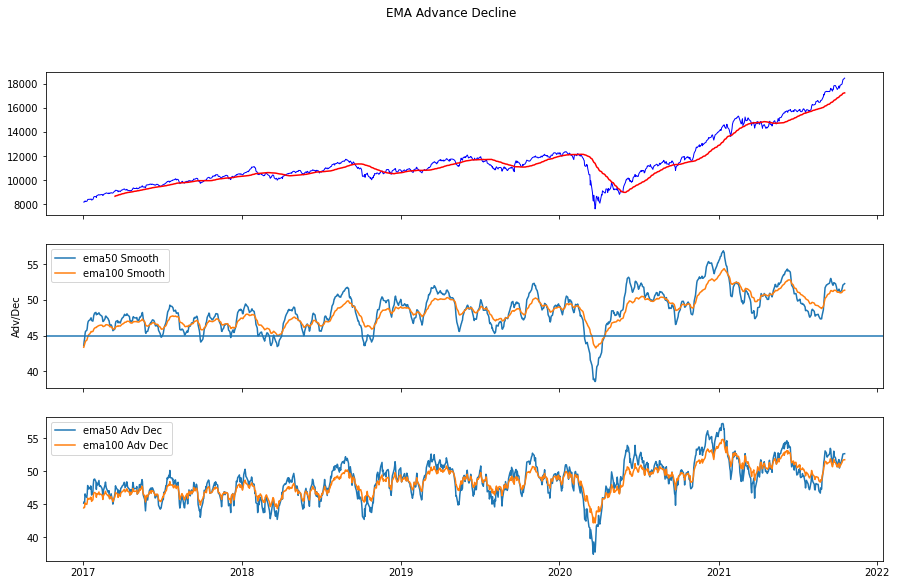

In [60]:
fig, ax = plt.subplots(3,1,figsize=(15,9),sharex=True)
ax[0].plot(nifty.loc[start_date:end_date, :].index, nifty.loc[start_date:end_date, 'Close'],'b-', linewidth=1, markersize=3, label='Price Low')
ax[0].plot(nifty.loc[start_date:end_date, :].index, nifty.loc[start_date:end_date, 'Close'].rolling(window=50).mean(),'r')
#ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ema10Low'], label='ema10Low')
ax[1].plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'smooth_ema50'], label='ema50 Smooth')
ax[1].plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'smooth_ema100'], label='ema100 Smooth')
ax[2].plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ema50AD'], label='ema50 Adv Dec')
ax[2].plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ema100AD'], label='ema100 Adv Dec')
ax[1].axhline(y=45)
ax[1].legend(loc='best')
ax[2].legend(loc='best')
ax[1].set_ylabel('Adv/Dec')
fig.suptitle('EMA Advance Decline')
plt.show()

In [61]:
df['advances'] = df['diff']

In [62]:
df['declines']= len(nifty100)-df['advances']

In [63]:
#mc-clellan oscillator 
# ratio adjusted advances=(advances - declines)/(advances+declines)
df['advances_ratio'] = (df['advances'] - df['declines'])/(df['advances']+df['declines'])

In [64]:
df['ema19'] = df['advances_ratio'].ewm(span=19).mean()
df['ema39'] = df['advances_ratio'].ewm(span=39).mean()

In [65]:
'''
McClellan Oscillator: 19-day EMA of RANA - 39-day EMA of RANA

19-day EMA* = (Current Day RANA - Prior Day EMA) * .10 + Prior Day EMA)
39-day EMA* = (Current Day RANA - Prior Day EMA) * .05 + Prior Day EMA)
'''

df['mcclellan19'] = (df['advances_ratio']-df['ema19'].shift(1))*0.1+df['ema19'].shift(1)

In [66]:
df['mcclellan39'] = (df['advances_ratio']-df['ema39'].shift(1))*0.05+df['ema39'].shift(1)

In [67]:
df['mcclellan']=df['mcclellan19']-df['mcclellan39']

In [68]:
df['mc_summation']=df['mcclellan'].cumsum()

In [69]:
'''
MCSI=PDMCSI+CDMCO
where:
MCSI=McClellan Summation Index
PDMCSI=Previous Day’s McClellan Summation Index,
equal to the t = 0 (initial value) MCSI value for that
specific period’s McClellan Oscillator
CDMCO=Current Day’s McClellan Oscillator
​'''
df['msci']=df['mcclellan']+df['mc_summation'].shift(1)

# Mc-Clellan Oscillator For Nifty

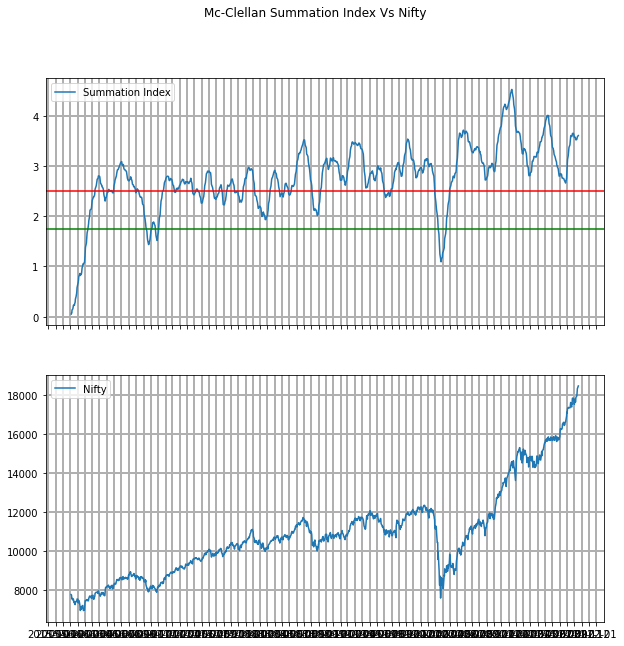

In [70]:
plt.rcParams["figure.figsize"] = (10,10)
fig,ax=plt.subplots(2,1,sharex=True)
ax[0].plot(df.loc[:,:].index,df.loc[:,'msci'],label='Summation Index')
ax[1].plot(nifty.loc[:,:].index,nifty.loc[:,'Close'],label='Nifty')
ax[0].axhline(y=2.5,color='r')
ax[0].axhline(y=1.75,color='g')
plt.suptitle('Mc-Clellan Summation Index Vs Nifty')
yloc = YearLocator()
mloc = MonthLocator()
ax[0].xaxis.set_major_locator(mloc)
ax[1].xaxis.set_major_locator(mloc)
ax[0].legend()
ax[1].legend()
ax[0].grid(linewidth =2)
ax[1].grid(linewidth =2)


plt.show()